## The Bavarian Game: Exercise 3
Submitted by **Mohammed Abbas Ansari, Kai Rothe**

### Task 1: Implementation of Feedback Types

#### Experiments Design

As our main task, we experimented with the block structure as mentioned in the slides:

| Attempts | Perturbation | Gradual | Feedback |
| :-: | :-: | :-:| :-: |
| 1 - 10 | False | False | complete |
| 11 - 40 | True | True | complete |
| 41 - 50 | False | False | complete |
| 51 - 60 | False | False | trajectory |
| 61 - 90 | True | True | trajectory |
| 91 - 100 | False | False | trajectory |
| 101 - 110 | False | False | endpos |
| 111 - 140 | True | True | endpos |
| 141 - 150 | False | False | endpos |
| 151 - 160 | False | False | rl |
| 161 - 190 | True | True | rl |
| 191 - 200 | False | False | rl |

#### Feedbacks Implementation Code
```py
def draw_feedback():
    """Display feedback based on the feedback type."""
    global feedback_type, last_trajectory, trajectory
    if not last_trajectory and trajectory:
        if feedback_type == 'trajectory':
            pygame.draw.lines(screen, YELLOW, False, trajectory[-1], 2)
        elif feedback_type == 'endpos':
            end_pos = trajectory[-1][-1]
            pygame.draw.circle(screen, WHITE, (int(end_pos[0]), int(end_pos[1])), pint_radius + 2, 2)
        elif feedback_type == 'rl':
            end_pos = trajectory[-1][-1]
            color = GREEN_LAMP if point_in_polygon(end_pos, GREEN_TRIANGLE) else RED_LAMP
            pygame.draw.circle(screen, color, START_POS, FREE_ZONE_RADIUS+10, 10)
```

#### Experiment Design Implementation
```py
no_perturb_trials = args.no_perturb
perturb_trials = args.perturb
none_feedback_block = [
    #Normal visual feedback
    {'feedback': None, 'perturbation': False, 'gradual': False, 'num_trials': no_perturb_trials},  # 10 trials without perturbation
    {'feedback': None, 'perturbation': True, 'gradual': True, 'num_trials': perturb_trials, 'initial_force': 0.2, 'sudden_force': 2.0},  # 30 trials with gradual perturbation
    {'feedback': None, 'perturbation': False, 'gradual': False, 'num_trials': no_perturb_trials},  # 10 trials without perturbation
]

trajectory_feedback_block = [
    # ADD Trajectory feedback
    {'feedback': "trajectory", 'perturbation': False, 'gradual': False, 'num_trials': no_perturb_trials},  # 10 trials without perturbation
    {'feedback': "trajectory", 'perturbation': True, 'gradual': True, 'num_trials': perturb_trials, 'initial_force': 0.2, 'sudden_force': 2.0},  # 30 trials with gradual perturbation
    {'feedback': "trajectory", 'perturbation': False, 'gradual': False, 'num_trials': no_perturb_trials},  # 10 trials without perturbation
]

endpos_feedback_block = [
    # ADD End position feedback
    {'feedback': "endpos", 'perturbation': False, 'gradual': False, 'num_trials': no_perturb_trials},  # 10 trials without perturbation
    {'feedback': "endpos", 'perturbation': True, 'gradual': True, 'num_trials': perturb_trials, 'initial_force': 0.2, 'sudden_force': 2.0},  # 30 trials with gradual perturbation
    {'feedback': "endpos", 'perturbation': False, 'gradual': False, 'num_trials': no_perturb_trials},  # 10 trials without perturbation
]

rl_feedback_block = [
    # ADD RL feedback
    {'feedback': "rl", 'perturbation': False, 'gradual': False, 'num_trials': no_perturb_trials},  # 10 trials without perturbation
    {'feedback': "rl", 'perturbation': True, 'gradual': True, 'num_trials': perturb_trials, 'initial_force': 0.2, 'sudden_force': 2.0},  # 30 trials with gradual perturbation
    {'feedback': "rl", 'perturbation': False, 'gradual': False, 'num_trials': no_perturb_trials},  # 10 trials without perturbation
]

forward_block_structure = none_feedback_block + trajectory_feedback_block + endpos_feedback_block + rl_feedback_block
reverse_block_structure = rl_feedback_block + endpos_feedback_block + trajectory_feedback_block + none_feedback_block

block_structure = forward_block_structure if not args.backward else reverse_block_structure
```

### Task 2: Analysis of feedback on unbiased subjects

We plot the end positions of each trial, grouping different feeback types in different subplots and different pertubations by color. Brown rectangles depict the table, green triangles the target zone resulting in positive score, red triangles the target zone resulting in negative score. The first, second and third block as denoted in the legend corresponds to the first, second and third block of the same feedback type, e.g. the second block of feedback type "end position" is block 8. Every first block and second block has 10 trials, every second block 30 trials. Pertubation during the second blocks is applied in positive direction along the x-axis.

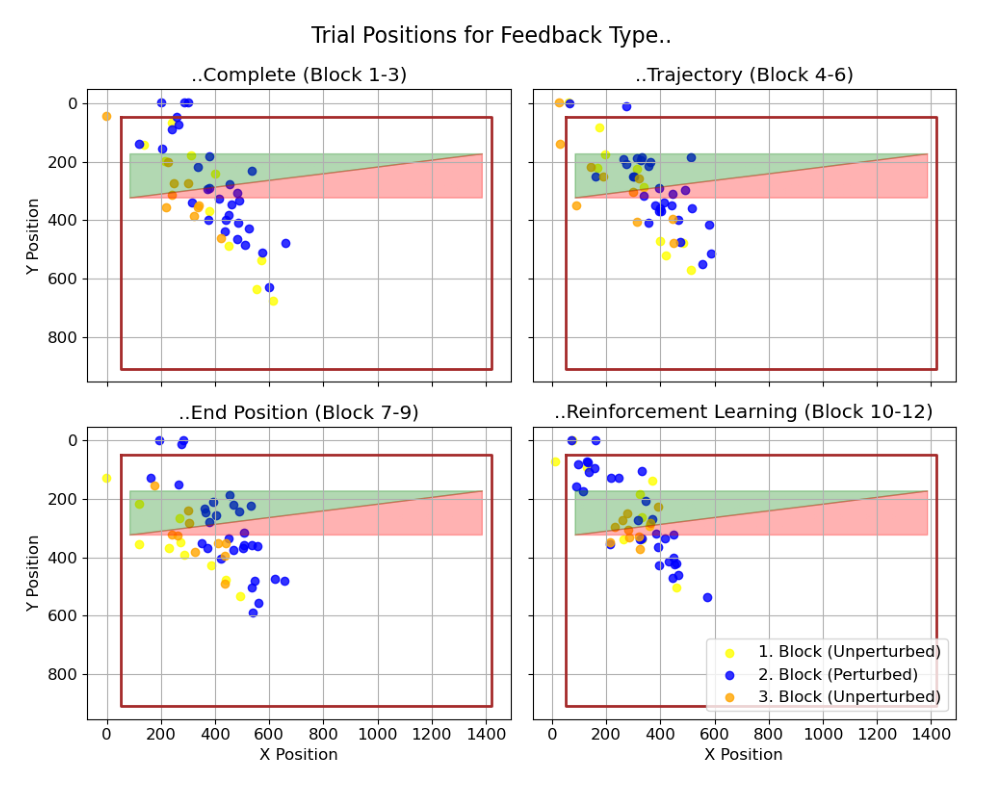

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(plt.imread(f"forward/subj1/scatter_plot.png"))
plt.axis("off")
plt.tight_layout()
plt.show()

### Task 3: Discussion of our results

What's the effect on subject's performance of each feedback type? Compared to the "complete" feedback, the performance during "trajectory" feedback improves (more target positions in green triangle). This might be due to less "cognitive load" for memorizing the trajectory and comparing it with the final target, or because the subject learned to improve during the previous three blocks. For "reinforcement learning" feedback the performance decreases, with bigger clusters of over- and undershoots. This shows that previous improvement in performance were due to the feedback type, not learning, and the clusters might be explained by the fact that with only binary feedback the subject gradually explores to shoot further / shorter, and thus adapts slower. The "end position" feedback performance is with more undershoots worse than "trajectory" and less overshoots better than "reinforcement learning". 

Under which feedback type was our subject able to adapt the best? For "trajectory", with most target positions in the green triangle during pertubation. We also observe the biggest after-effect for "trajectory" (orange positions have smaller angle than / more to the left compared to yellow ones) and no after-effect for "reinforcement learning" feedback, which fits our expectation of no adapation through sensory errors during "reinforcement learning" feedback.

### Task 4: Design and discussion of our own experiment

We repeat the experiment with another unbiased subject, but in reversed order of feedback type, such that the subject starts with the least informative feedback (of type reinforcement learning) and continues with increasingly informative feedback:

| Attempts | Perturbation | Gradual | Feedback |
| :-: | :-: | :-:| :-: |
| 1 - 10 | False | False | rl |
| 11 - 40 | True | True | rl |
| 41 - 50 | False | False | rl |
| 51 - 60 | False | False | endpos |
| 61 - 90 | True | True | endpos |
| 91 - 100 | False | False | endpos |
| 101 - 110 | False | False | trajectory |
| 111 - 140 | True | True | trajectory |
| 141 - 150 | False | False | trajectory |
| 151 - 160 | False | False | complete |
| 161 - 190 | True | True | complete |
| 191 - 200 | False | False | complete |

This was interesting to us, since the performance of the subject might not only depend on each feedback type, but also the previous blocks, especially on the information gained during previous more informative feedback. 

During "reinforcement learning" feedback we observe no adaptation and worse performance after pertubation, which can be explained by the fact that the subject doesn't observe the pertubation and the binary feedback was not informative enough to adapt (fast enough). During "end position" and "trajectory" feedback the subject does a lot of out of bounds errors because there was no feedback that this will result in -50 points. Only during "complete" feedback the subject realizes to avoid out of bound errors because of the then given score feedback. 

By comparison with the previous experiment, e.g. much worse performance during "reinforcement learning" feedback for reversed order of feedback type, we therefore conclude that previous information is important for performance e.g. during "reinforcement learning" feedback, comparable to the research shown in the lecture which found that the forward model during motor adaptation improves subsequent visual prediction learning. But we note here the confounding factor of no information about negative scores for out of bounds errors during "end position" and "trajectory" feedback, and of comparing different subjects. 

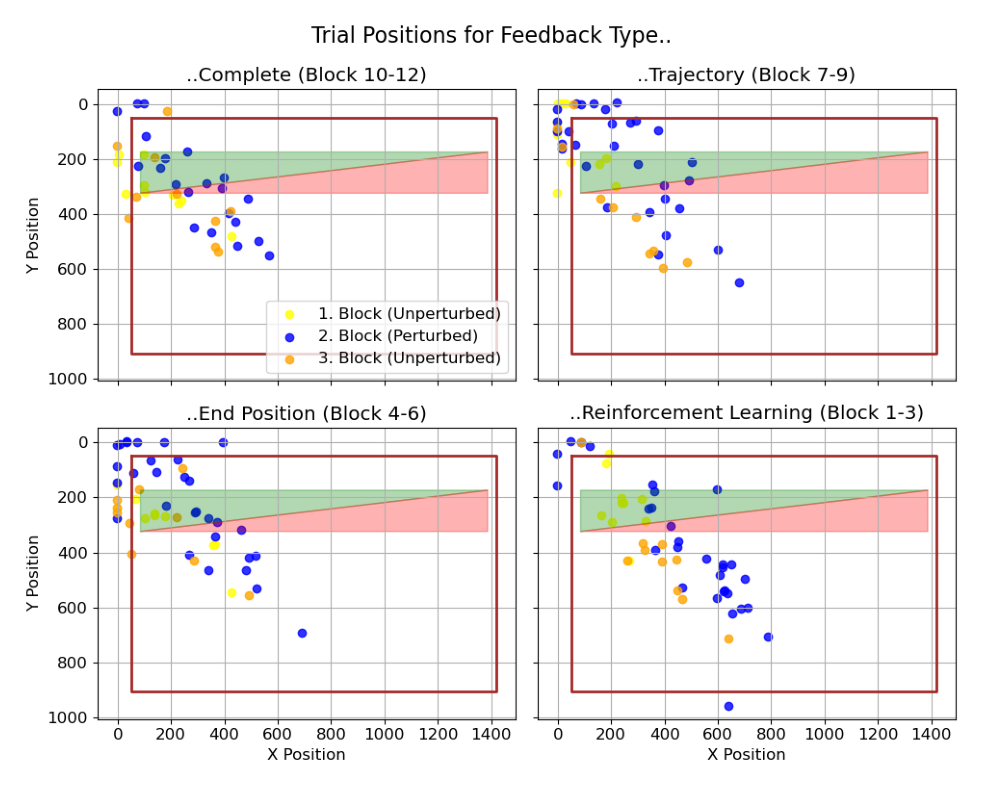

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
plt.imshow(plt.imread(f"backward/subj0/scatter_plot.png"))
plt.axis("off")
plt.tight_layout()
plt.show()